# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In [58]:
import numpy as np
import matplotlib.pyplot as plt

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [59]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [60]:
np.random.seed(0)   #impongo seed generatore numeri casuali

#Determino le x di allenamento e validazione
x_train = np.random.uniform(-1, 1, 500) #Ascisse Train
x_valid = np.random.uniform(-1, 1, 50)  #Ascisse Test
x_valid.sort()  #Ordino in modo crescente ascisse test

y_target = m * x_valid + b  #Distribuzione target

sigma = 0.3 #Stddev per rumore gaussiano
y_train = np.random.normal(m * x_train + b, sigma)  #Valori con rumore per allenamento
y_valid = np.random.normal(m * x_valid + b, sigma)  #Valori con rumore per test

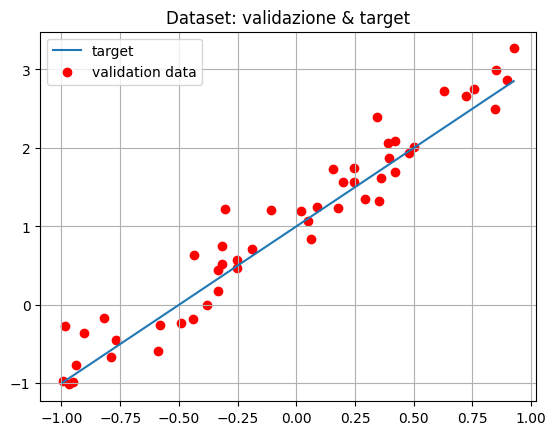

In [61]:
#Plotto dataset di test e validazione
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title("Dataset: validazione & target")
plt.legend()

plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [62]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#Creo un oggetto di tipo sequential (modello sequenziale di rete neurale)
#Modello sequenziale = pila lineare di strati neurali (informazioni passano da uno strato a quello successivo)
model = tf.keras.Sequential()

#Aggiungo un nuovo strato al modello - sto usando tipo Dense (completamente connesso)
#Primo parametro significa che layer avrà un solo neurone
#Secondo parametro (input shape) è la forma dell'input che mi devo aspettare. Ho in questo caso un vettore di dimensione 1
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [63]:
#Restituisce un'informazione di come è costruita la nostra rete neurale
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [64]:
#Alleno il modello utilizzando il dataset di allenamento
# over 10 epochs of 32 batch size each
# report training progress against validation data

#Sto allenando il modello utilizzando la funzione fit
# 1 -> x_train - sono gli input
# 2 -> y_train - sono le etichette
# 3 -> batch_size -  numero campioni di validazione che vengono utilizzati in una singola iterazione per calcolare le metriche di valutazione.
# 4 -> epochs - presenta il numero di epoche, ossia quante volte l'intero dataset viene presentato alla rete neurale per l'allenamento
# 5 -> shuffle - i dati vengono mescolati casualmente prima di ogni epoca, evito di abituarmi a ordine dati
# 6 -> validation_data - dati di validazione da utilizzare durante l'addestramento per valutare le prestazioni del modello su dati non visti durante l'addestramento
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 12ms/step - loss: 2.7205 - mse: 2.7205 - val_loss: 2.2000 - val_mse: 2.2000
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 2.0222 - mse: 2.0222 - val_loss: 1.6649 - val_mse: 1.6649
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 1.5492 - mse: 1.5492 - val_loss: 1.2869 - val_mse: 1.2869
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 1.2101 - mse: 1.2101 - val_loss: 1.0148 - val_mse: 1.0148
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.9620 - mse: 0.9620 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7765 - mse: 0.7765 - val_loss: 0.6603 - val_mse: 0.6603
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6337 - mse: 0.6337 - val_loss: 0.5432 - val_mse: 0.5432
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5231 - mse: 0.5

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [65]:
# return weights and biases
model.get_weights()

[array([[1.9378062]], dtype=float32), array([0.96742827], dtype=float32)]

In [66]:
#Valuto il modello ottenuto
# 1 -> x_valid - features di validazione
# 2 -> y_valid - etichette di validazione
# 3 -> batch_size - campioni di validazione che vengono utilizzati in una singola iterazione per calcolare le metriche di valutazione.
# 4 -> verbose - verbose=1 controlla l'output durante la valutazione. Un valore di 1 indica di 
#                mostrare l'avanzamento della valutazione durante l'esecuzione.
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

#Il metodo evaluate() calcola e restituisce le metriche di valutazione del modello sui dati di validazione. 
#Queste metriche possono includere l'accuratezza, la perdita (loss), o altre metriche specificate durante la compilazione del modello.

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.1010 - mse: 0.1010

Test loss: 0.10096920281648636
Test accuracy: 0.10096920281648636


In [67]:
#Valuto il modello con la curva perfetta
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - mse: 0.0021    

Test loss: 0.002082710387185216
Test accuracy: 0.002082710387185216


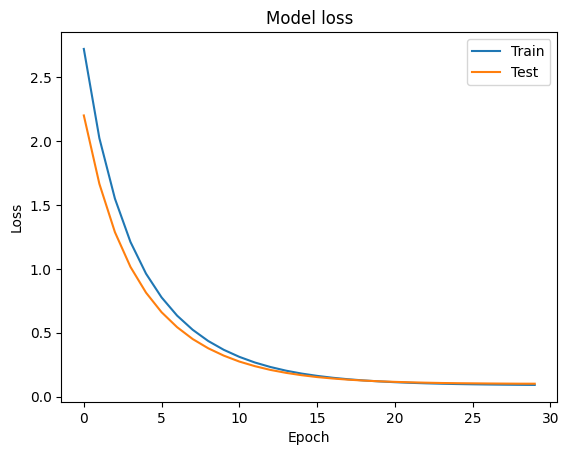

In [68]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 2ms/step


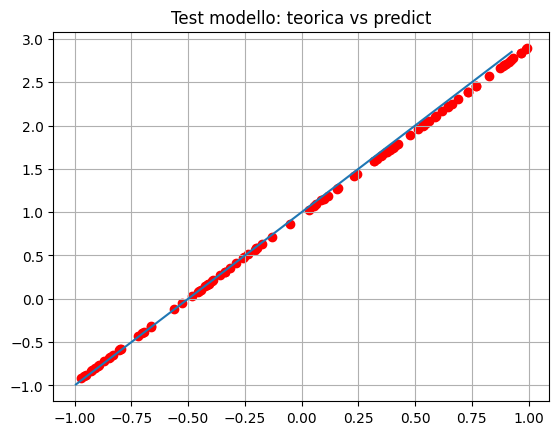

In [69]:
x_predicted = np.random.uniform(-1, 1, 100)

#Il metodo predict() prende come input i dati di input x_predicted e restituisce le previsioni corrispondenti generate dal modello.
#applica il modello alle features di input per ottenere le corrispondenti previsioni di output.

y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label = 'Modello')
plt.plot(x_valid, y_target, label = 'Teorica')
plt.title("Test modello: teorica vs predict")

plt.grid(True)
plt.show()

# Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Cambio numero epoche

In [70]:
loss5 = np.loadtxt('Esercizio_1/Cambio_N_epo/Loss5.dat')
loss20 = np.loadtxt('Esercizio_1/Cambio_N_epo/Loss20.dat')
loss45 = np.loadtxt('Esercizio_1/Cambio_N_epo/Loss45.dat')
loss200 = np.loadtxt('Esercizio_1/Cambio_N_epo/Loss200.dat')

valid = np.loadtxt('Esercizio_1/Cambio_N_epo/Valid.dat')
pred = np.loadtxt('Esercizio_1/Cambio_N_epo/Pred.dat')

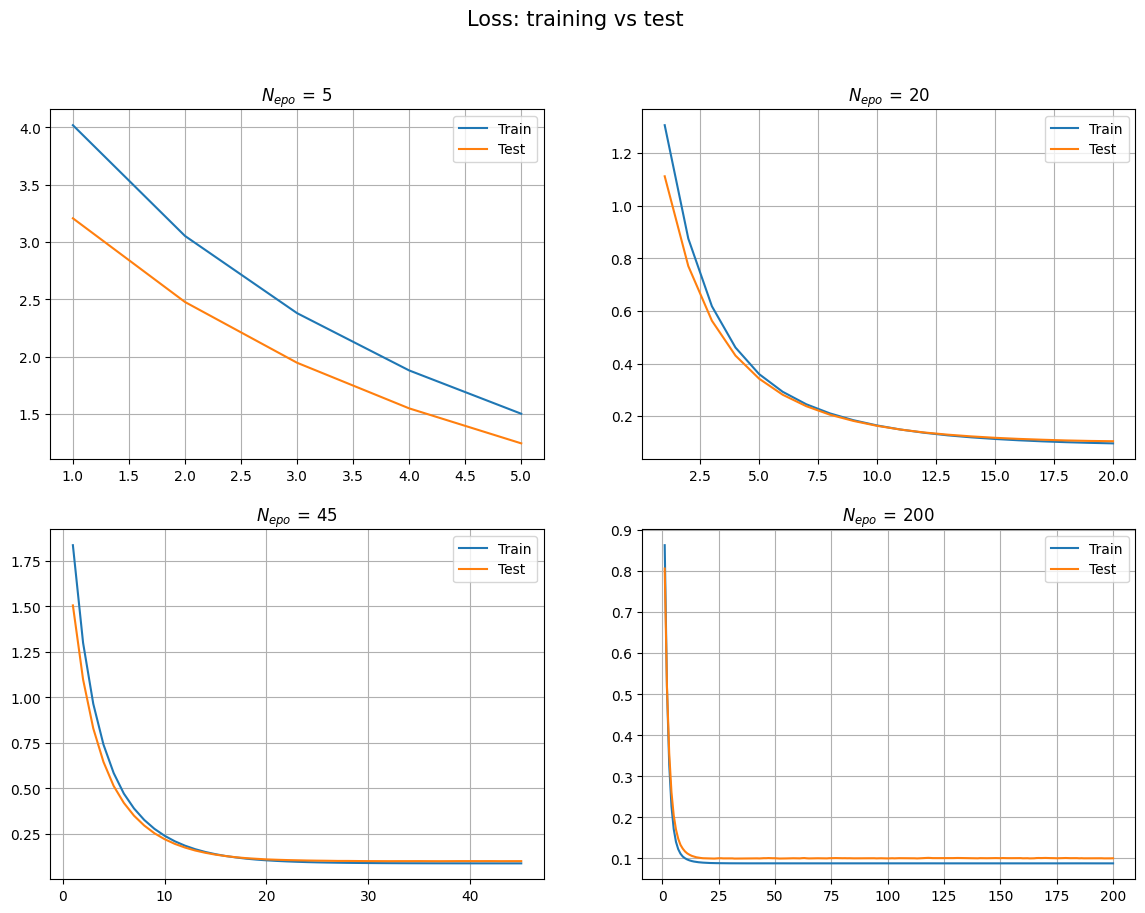

In [71]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
N_epo = np.array([5, 20, 45, 200])

for i in range(0, 2):
    for j in range(0, 2):
        if i==0 and j==0:
            x = np.array([i for i in range(1, 6)])
            ax[i][j].plot(x, loss5[0, :])
            ax[i][j].plot(x, loss5[1, :])
        elif i==0 and j==1:
            x = np.array([i for i in range(1, 21)])
            ax[i][j].plot(x, loss20[0, :])
            ax[i][j].plot(x, loss20[1, :])
        elif i==1 and j==0:
            x = np.array([i for i in range(1, 46)])
            ax[i][j].plot(x, loss45[0, :])
            ax[i][j].plot(x, loss45[1, :])
        elif i==1 and j==1:
            x = np.array([i for i in range(1, 201)])
            ax[i][j].plot(x, loss200[0, :])
            ax[i][j].plot(x, loss200[1, :])
        
        ax[i][j].set_title(r'$N_{epo}\,=\,$' + str(N_epo[2*i+j]))
        ax[i][j].legend(['Train', 'Test'], loc='best')
        ax[i][j].grid(True)

        
        
fig.suptitle('Loss: training vs test',fontsize = '15')
plt.show()

#dropout spento un test

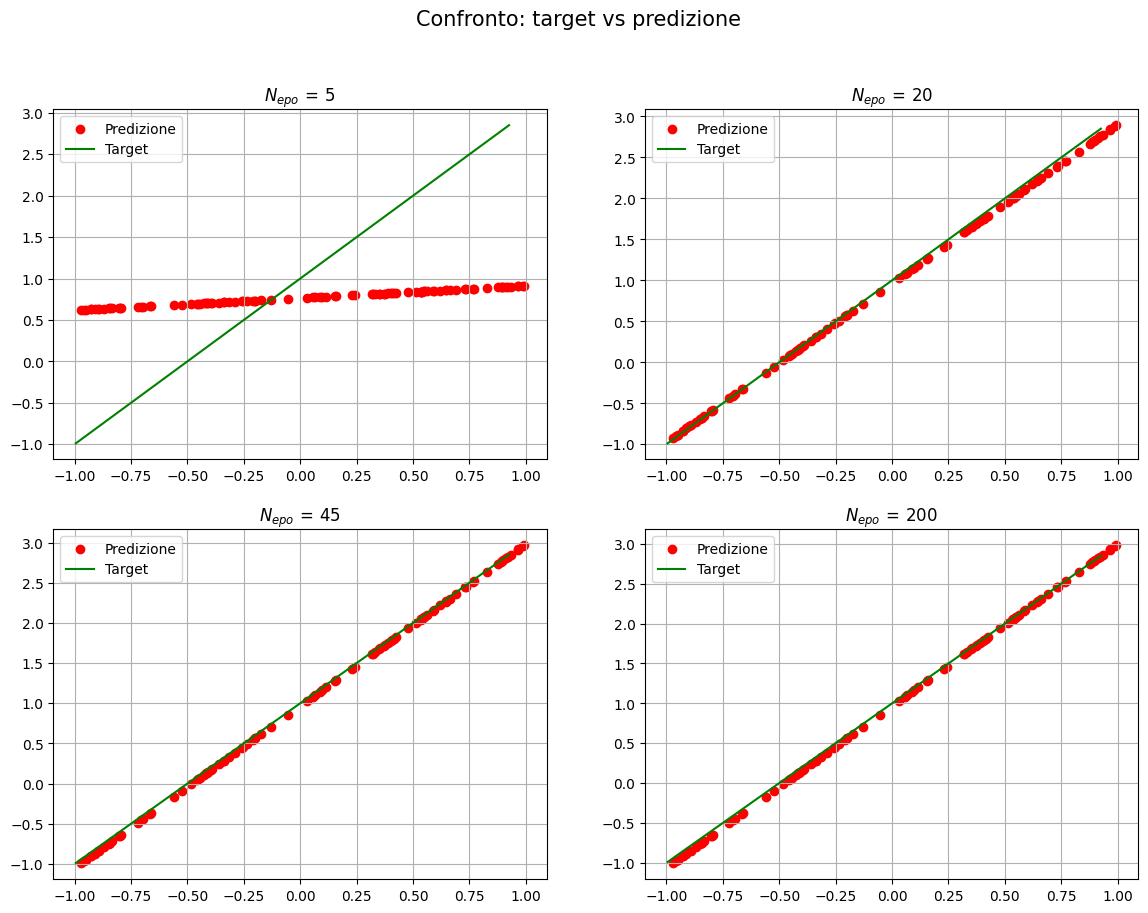

In [72]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
N_epo = np.array([5, 20, 45, 200])

for i in range(0, 2):
    for j in range(0, 2):
        if i==0 and j==0:
            ax[i][j].scatter(pred[0, :], pred[1, :], color = 'red')
        elif i==0 and j==1:
            ax[i][j].scatter(pred[2, :], pred[3, :], color = 'red')
        elif i==1 and j==0:
            ax[i][j].scatter(pred[4, :], pred[5, :], color = 'red')
        elif i==1 and j==1:
            ax[i][j].scatter(pred[6, :], pred[7, :], color = 'red')
        
        ax[i][j].plot(valid[0, :], valid[1, :], color = 'green')
        ax[i][j].set_title(r'$N_{epo}\,=\,$' + str(N_epo[2*i+j]))
        ax[i][j].legend(['Predizione', 'Target'], loc='best')
        ax[i][j].grid(True)

        
        
fig.suptitle('Confronto: target vs predizione',fontsize = '15')
plt.show()

### Cambio numero punti di Training

In [73]:
loss = np.loadtxt('Esercizio_1/Cambio_N_train/Loss.dat')
pred_t = np.loadtxt('Esercizio_1/Cambio_N_train/Pred.dat')

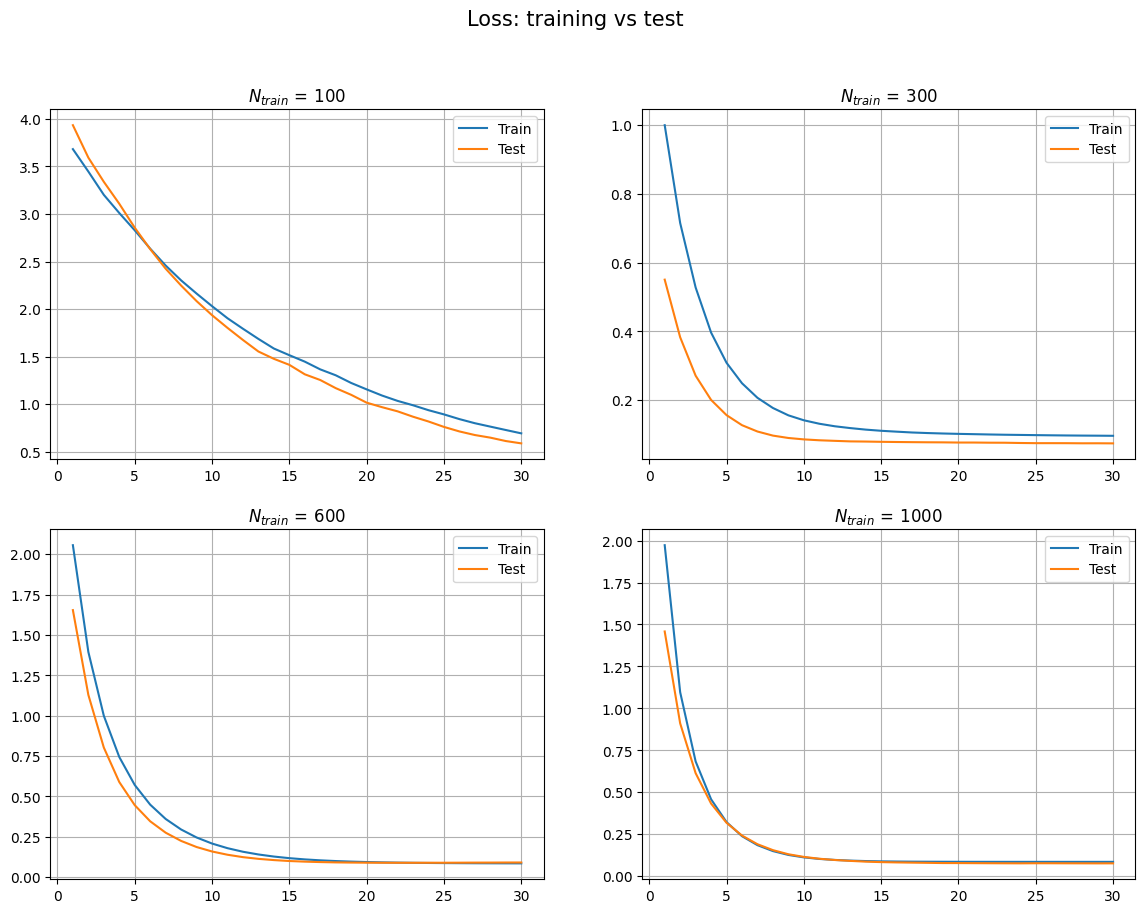

In [74]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
titoli = np.array([100, 300, 600, 1000])

for i in range(0, 2):
    for j in range(0, 2):
        x = np.array([i for i in range(1, 31)])
        ax[i][j].plot(x, loss[2*(2*i+j), :], label = 'Train')
        ax[i][j].plot(x, loss[2*(2*i+j)+1, :], label = 'Prediction')
        
        ax[i][j].set_title(r'$N_{train}\,=\,$' + str(titoli[2*i+j]))
        ax[i][j].grid(True)   
        ax[i][j].legend(['Train', 'Test'], loc='best')
        
fig.suptitle('Loss: training vs test',fontsize = '15')
plt.show()

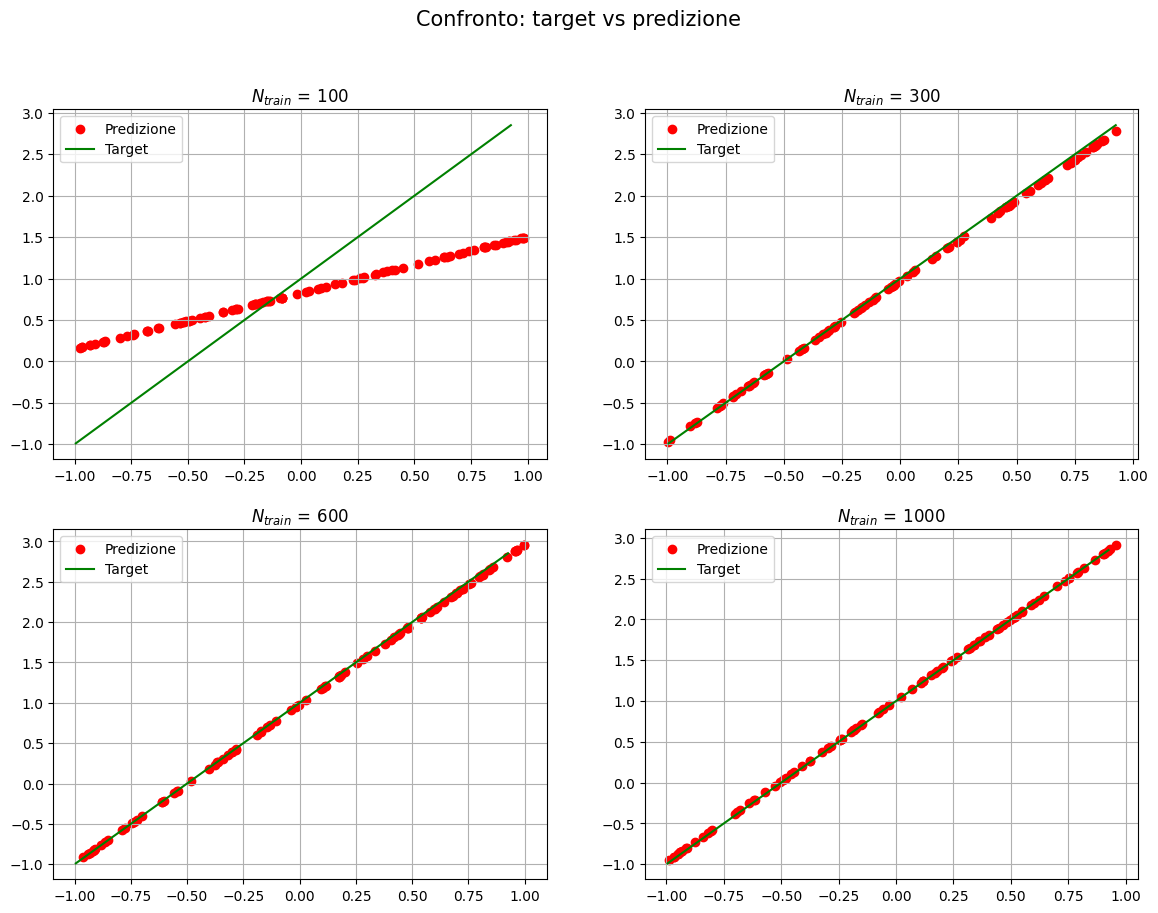

In [75]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))

for i in range(0, 2):
    for j in range(0, 2):
        if i==0 and j==0:
            ax[i][j].scatter(pred_t[0, :], pred_t[1, :], color = 'red')
        elif i==0 and j==1:
            ax[i][j].scatter(pred_t[2, :], pred_t[3, :], color = 'red')
        elif i==1 and j==0:
            ax[i][j].scatter(pred_t[4, :], pred_t[5, :], color = 'red')
        elif i==1 and j==1:
            ax[i][j].scatter(pred_t[6, :], pred_t[7, :], color = 'red')
        
        ax[i][j].plot(valid[0, :], valid[1, :], color = 'green')
        ax[i][j].set_title(r'$N_{train}\,=\,$' + str(titoli[2*i+j]))
        ax[i][j].legend(['Predizione', 'Target'], loc='best')
        ax[i][j].grid(True)

        
        
fig.suptitle('Confronto: target vs predizione',fontsize = '15')
plt.show()

### Cambio valori di sigma

In [76]:
loss = np.loadtxt('Esercizio_1/Cambio_sig/Loss.dat')
pred_t = np.loadtxt('Esercizio_1/Cambio_sig/Pred.dat')

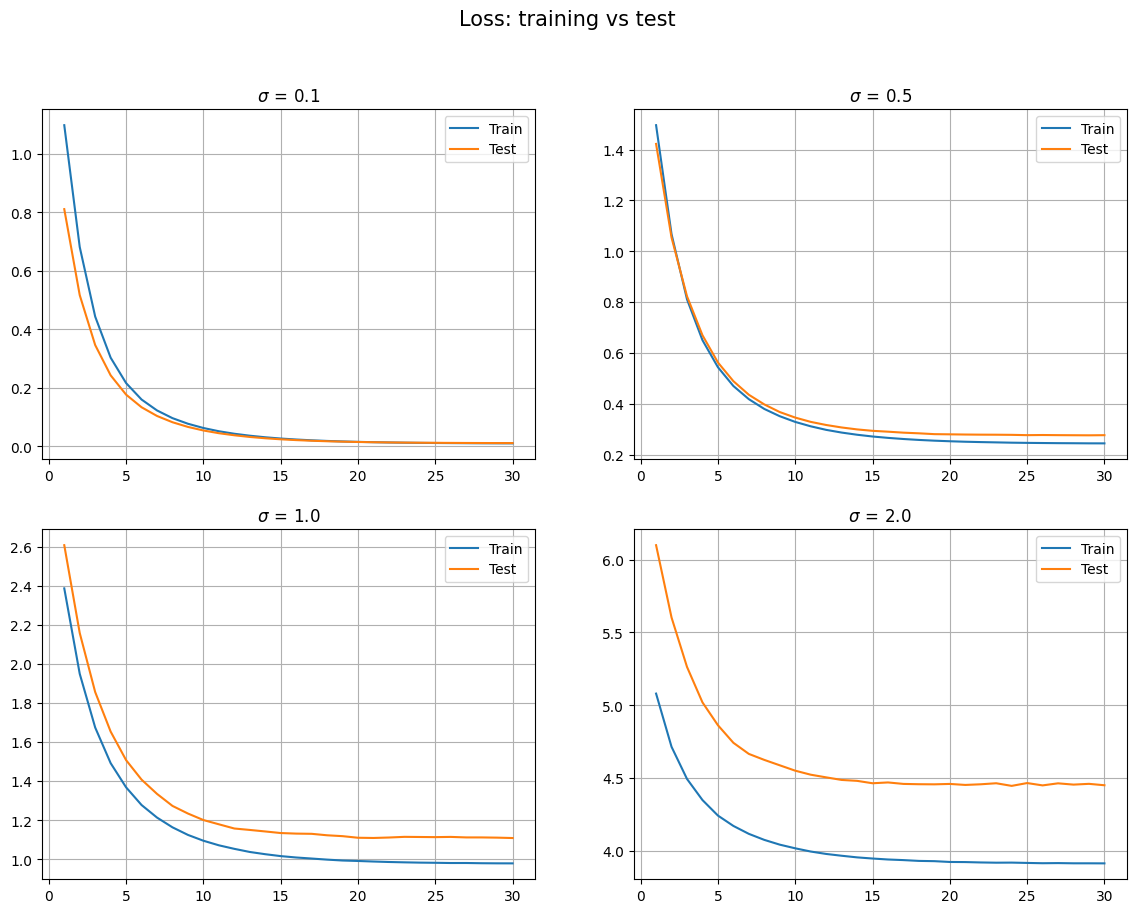

In [77]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
titoli = np.array([0.1, 0.5, 1, 2])

for i in range(0, 2):
    for j in range(0, 2):
        x = np.array([i for i in range(1, 31)])
        ax[i][j].plot(x, loss[2*(2*i+j), :], label = 'Train')
        ax[i][j].plot(x, loss[2*(2*i+j)+1, :], label = 'Prediction')
        
        ax[i][j].set_title(r'$\sigma\,=\,$' + str(titoli[2*i+j]))
        ax[i][j].grid(True)   
        ax[i][j].legend(['Train', 'Test'], loc='best')
        
fig.suptitle('Loss: training vs test',fontsize = '15')
plt.show()

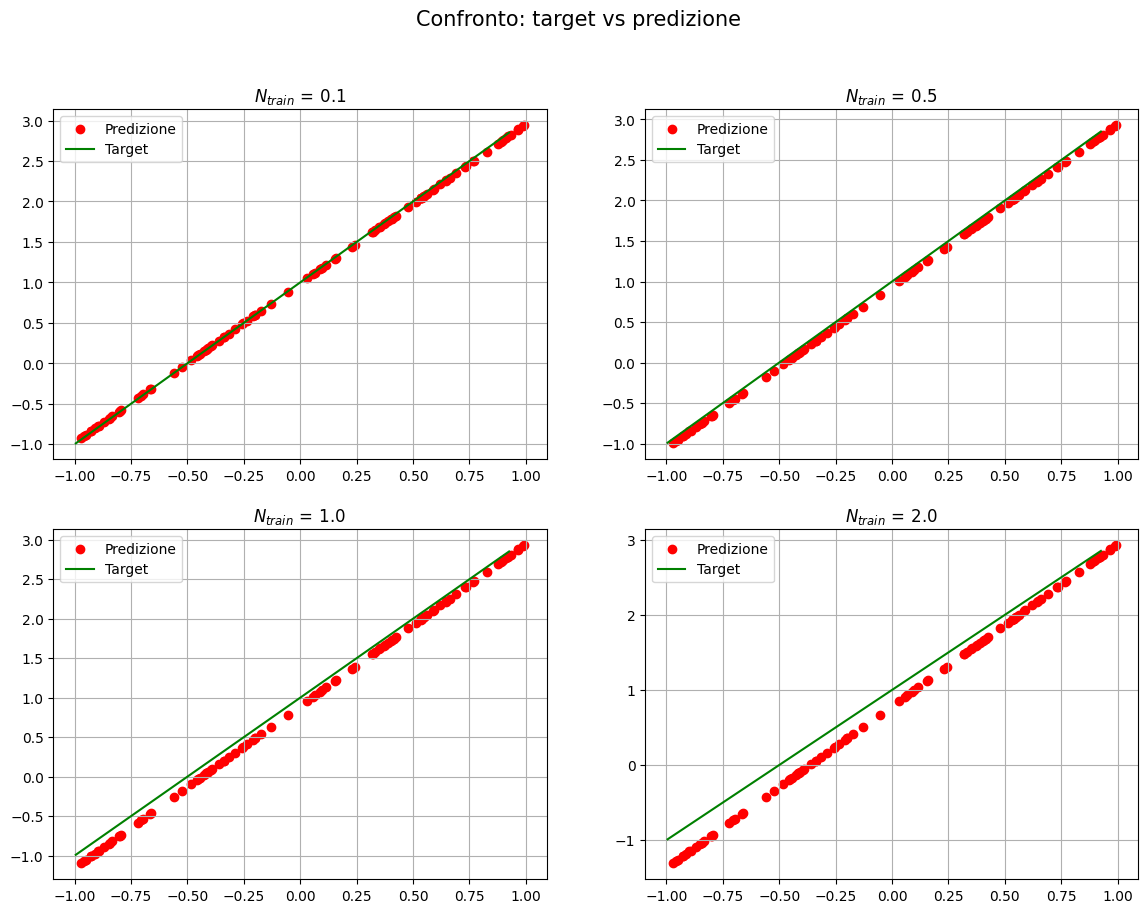

In [78]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))

for i in range(0, 2):
    for j in range(0, 2):
        if i==0 and j==0:
            ax[i][j].scatter(pred_t[0, :], pred_t[1, :], color = 'red')
        elif i==0 and j==1:
            ax[i][j].scatter(pred_t[2, :], pred_t[3, :], color = 'red')
        elif i==1 and j==0:
            ax[i][j].scatter(pred_t[4, :], pred_t[5, :], color = 'red')
        elif i==1 and j==1:
            ax[i][j].scatter(pred_t[6, :], pred_t[7, :], color = 'red')
        
        ax[i][j].plot(valid[0, :], valid[1, :], color = 'green')
        ax[i][j].set_title(r'$N_{train}\,=\,$' + str(titoli[2*i+j]))
        ax[i][j].legend(['Predizione', 'Target'], loc='best')
        ax[i][j].grid(True)

        
        
fig.suptitle('Confronto: target vs predizione',fontsize = '15')
plt.show()

# Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [79]:
loss = np.loadtxt('Esercizio_2/Loss.dat')
pred1 = np.loadtxt('Esercizio_2/Pred1.dat')
pred2 = np.loadtxt('Esercizio_2/Pred2.dat')

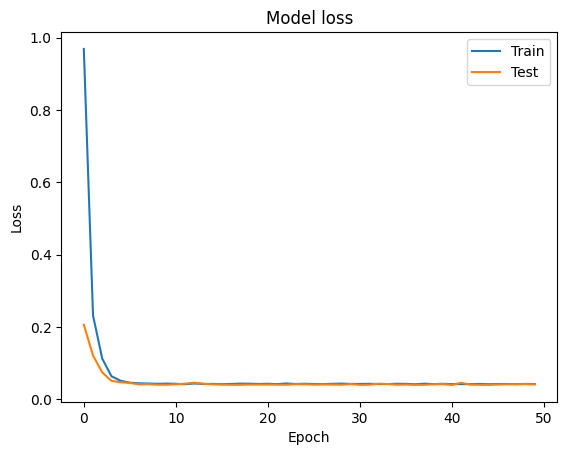

In [80]:
#Stampo valore Loss-Function
plt.plot(loss[0, :], label = 'Train')
plt.plot(loss[1, :], label = 'Test')

plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model loss')

plt.show()

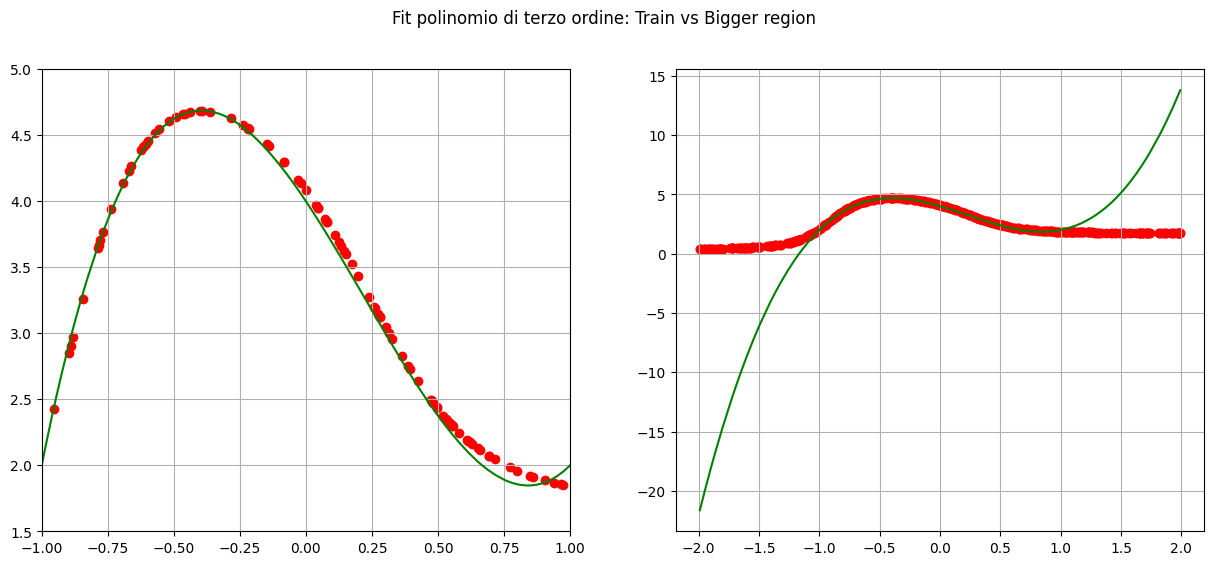

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

for i in range(0, 2):
    ax[i].plot(pred2[2,:], pred2[3, :], color = 'green')
    if i==0:
        ax[i].scatter(pred1[0, :], pred1[1, :], color = 'red')
        ax[i].set_xlim(-1, 1)
        ax[i].set_ylim(1.5, 5)
    
    else:
        ax[i].scatter(pred2[0, :], pred2[1, :], color = 'red')
    
    ax[i].grid(True)

fig.suptitle("Fit polinomio di terzo ordine: Train vs Bigger region")
plt.show()

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [82]:
#Genero i dataset di training e controllo
np.random.seed(0)

Ntrain = 5000
Ntest = 500

#Ascisse e ordinate per trainig
x_train = np.random.uniform(-1.5, 1.5, Ntrain)
y_train = np.random.uniform(-1.5, 1.5, Ntrain)

#Ascisse e orinate per validation
x_valid = np.random.uniform(-1.5, 1.5, Ntest)
y_valid = np.random.uniform(-1.5, 1.5, Ntest)

#Riordino in ordine crescente ascisse e ordinate per validazione
x_valid.sort()
y_valid.sort()

#Calcolo valore della funzione per test
z_target = np.sin(pow(x_valid, 2) + pow(y_valid, 2))

#Genero rumori su valori di z per training e test
sigma = 0.1 # noise standard deviation
z_train = np.random.normal(np.sin(pow(x_train, 2) + pow(y_train, 2)),sigma)
z_valid = np.random.normal(np.sin(pow(x_valid, 2) + pow(y_valid, 2)),sigma)

In [83]:
model2 = tf.keras.Sequential([
    keras.layers.Dense(120, activation='relu', input_shape=(2,)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1)
])

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='adam', loss='mse')

history = model2.fit(x=np.column_stack((x_train,y_train)), y=z_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid,y_valid)), z_valid))

Epoch 1/20
157/157 [==============================] - 2s 4ms/step - loss: 0.1427 - val_loss: 0.2439
Epoch 2/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0728 - val_loss: 0.0721
Epoch 3/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.0169
Epoch 4/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0128
Epoch 5/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0135
Epoch 6/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.0116
Epoch 7/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.0173
Epoch 8/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0128
Epoch 9/20
157/157 [==============================] - 1s 3ms/step - loss: 0.0127 - val_loss: 0.0112
Epoch 10/20
157/157 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.0124

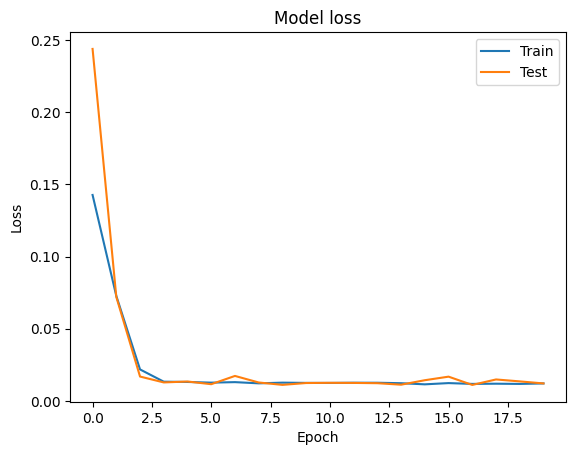

In [84]:
appo = history.history['loss']
pippo = history.history['val_loss']

plt.plot(appo)
plt.plot(pippo)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

313/313 [==============================] - 0s 1ms/step


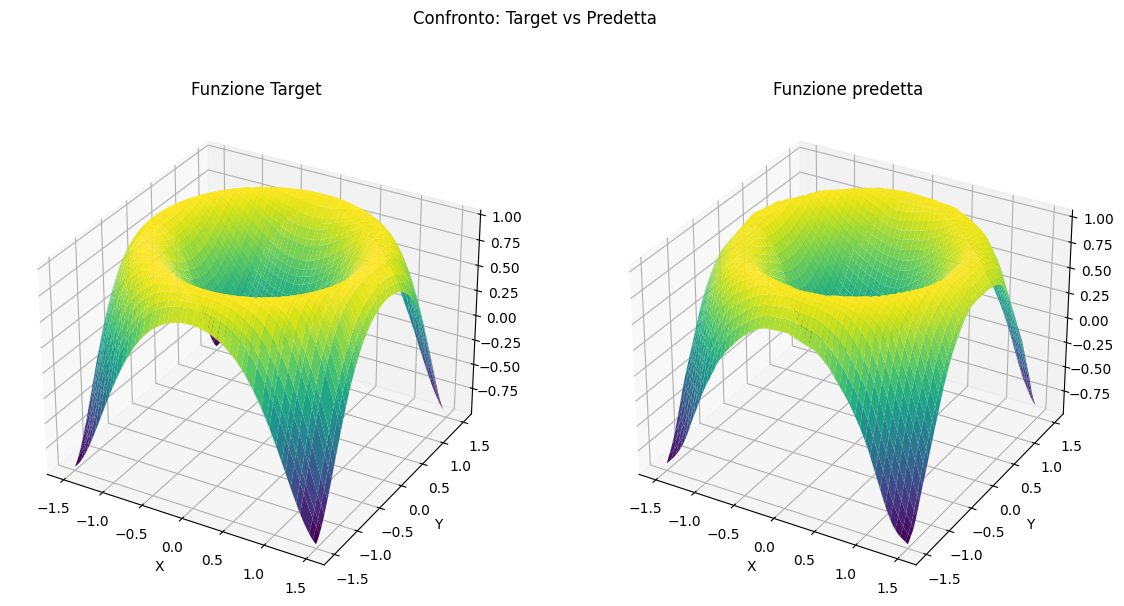

In [85]:
# Definizione della funzione di due variabili
def my_function(x, y):
    return np.sin(pow(x, 2) + pow(y, 2))

# Generazione dei dati per il plot
x = x_valid
y = y_valid
X, Y = np.meshgrid(x, y)
Z = my_function(X, Y)

# Creazione del grafico 3D
fig = plt.figure(figsize = (14, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Funzione Target')

# Personalizzazione dell'aspetto del grafico
ax1.set_xlabel('X')
ax1.set_ylabel('Y')


# Generazione dei dati per il plot
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = model2.predict(np.column_stack((X.flatten(), Y.flatten()))).reshape(X.shape)


ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')

# Personalizzazione dell'aspetto del grafico
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Funzione predetta')


fig.suptitle('Confronto: Target vs Predetta')
plt.show()

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [86]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

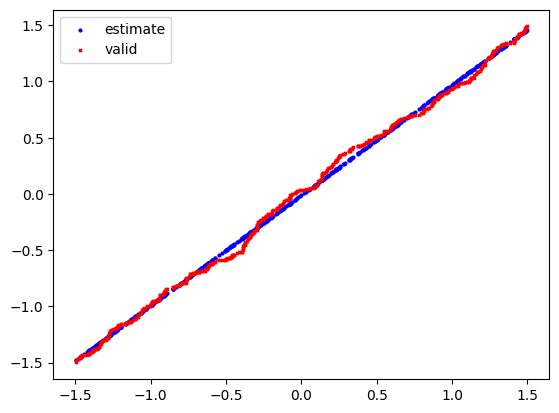

16/16 [==============================] - 0s 32ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0019 - val_mse: 0.0019


[array([[0.9811376]], dtype=float32), array([-0.00990111], dtype=float32)]

In [87]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()